In [185]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [432]:
files = os.listdir("/Users/kieranvaudaux/Desktop/Master 2/Data Visualisation/NoMoreBarPlots/Data_clean");
files.remove('.DS_Store')
country_or_area = (pd.read_csv("/Users/kieranvaudaux/Desktop/Master 2/Data Visualisation/NoMoreBarPlots/Country or Area"))["0"]


76

In [174]:
mediane_number_of_obs_by_country = pd.DataFrame(index = files, columns = country_or_area)
min_number_of_obs_by_country = pd.DataFrame(index = files, columns= country_or_area)
max_number_of_obs_by_country = pd.DataFrame(index = files, columns = country_or_area)

In [175]:
for i in range(len(files)):
    df = pd.read_csv("Data_clean/"+files[i]);
    country = df["Country or Area"].unique();
    for j in range(len(country)):
        
        list_ = np.array([df[(df.loc[:,'Country or Area'] == country[j]) & (df.loc[:,'Transaction'] == transaction)]["Quantity"].shape[0] for transaction in df[df.loc[:,'Country or Area'] == country[j]]["Transaction"].unique()])
        list_ = list_[np.nonzero(list_)];
        
        mediane_number_of_obs_by_country.loc[files[i]][country_or_area[j]] = np.median(list_)
        min_number_of_obs_by_country.loc[files[i]][country_or_area[j]] = np.min(list_)
        max_number_of_obs_by_country.loc[files[i]][country_or_area[j]] = df[df.loc[:,'Country or Area'] == country_or_area[j]]["Quantity"].max()

In [306]:
data_by_country_and_files = pd.DataFrame(index = files, columns = country_or_area)
subdataset_by_country_and_files = pd.DataFrame(index = files, columns = country_or_area)

for i in range(len(files)):
    df = pd.read_csv("Data_clean/"+files[i]);
    country = df["Country or Area"].unique();
    for j in range(len(country)):
        
        data_by_country_and_files.loc[files[i]][country_or_area[j]] = df[df.loc[:,'Country or Area'] == country[j]]["Quantity"].shape[0]
        subdataset_by_country_and_files.loc[files[i]][country_or_area[j]] = (df[df.loc[:,'Country or Area'] == country[j]]["Transaction"].unique()).shape[0]


In [309]:
data_by_country_and_files

0,Czechia,Germany,Reunion,Niue,Other Asia,"Korea, Dem.Ppl's.Rep.",Pacific Islands (former),Austria,"Korea, Republic of",Bangladesh,...,Cabo Verde,Bulgaria,Liechtenstein,Timor-Leste,Mexico,Marshall Islands,Turkmenistan,State of Palestine,Belgium,Brunei Darussalam
Heat from combustible fuels.csv,62,54,4,371,89,246,241,84,274,178,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fuel Oil.csv,211,372,342,63,449,163,681,142,180,986,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Natural Gas Liquid.csv,12,218,76,149,215,151,129,127,156,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Coke Oven Gas.csv,162,211,296,406,374,64,343,231,279,348,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Charcoal.csv,201,188,200,212,192,208,257,49,167,220,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Liquified Petroleum Gas.csv,238,317,487,126,186,408,186,191,568,387,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Black liquor.csv,220,300,210,42,92,210,57,160,274,244,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aviation gasoline.csv,21,39,198,265,9,307,239,42,194,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Tide, wave and ocean electricity.csv",30,30,4,7,1,1,11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


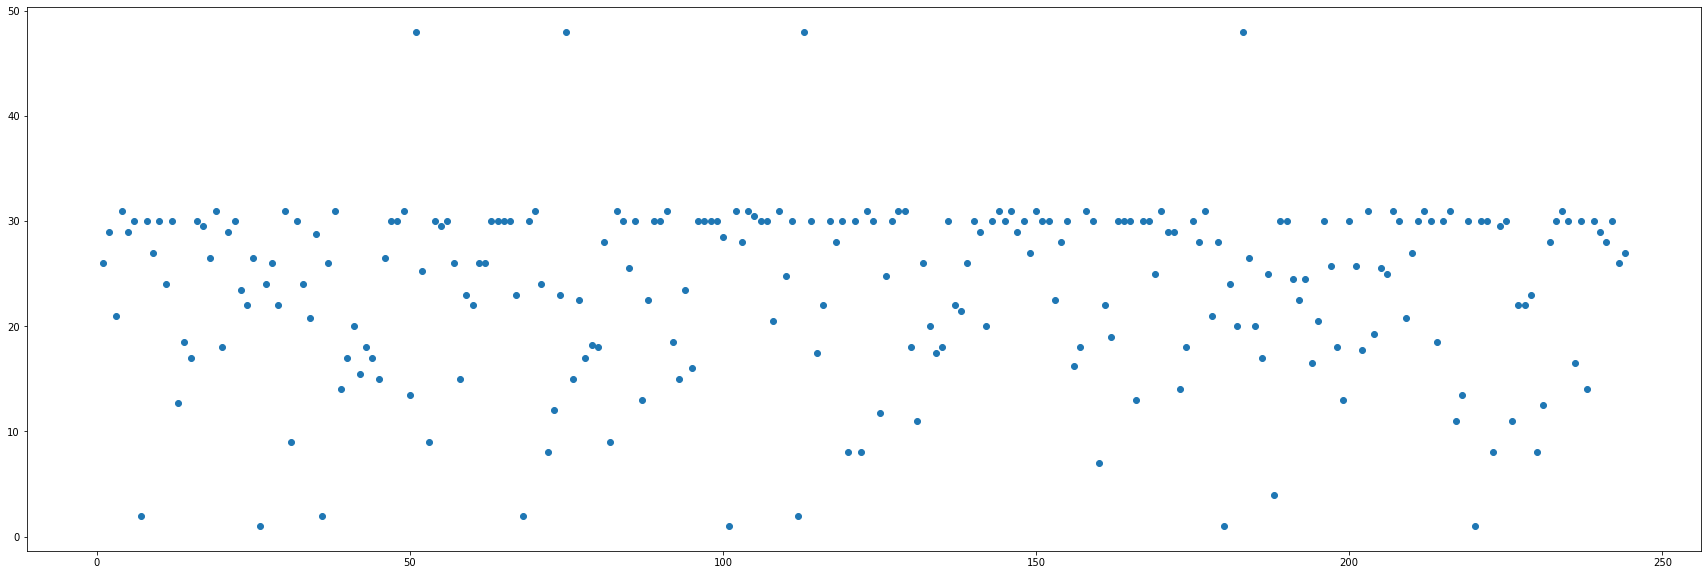

In [286]:
med = mediane_number_of_obs_by_country.median(axis = 0)

fig = plt.figure(figsize=(30,10))
fig.title("")
plt.plot(np.arange(1,len(med)+1),med,'o')
#plt.savefig("median_by_country.pdf")

In [216]:
number_of_country_by_files = mediane_number_of_obs_by_country.count(axis = 1)
#number_of_country_by_files

In [217]:
number_of_files_by_country = mediane_number_of_obs_by_country.count(axis = 0)
#number_of_files_by_country

(array([ 0.,  1.,  0.,  0.,  0.,  2.,  1.,  1.,  5.,  3.,  6.,  5.,  7.,
         6.,  9., 11.,  1.,  3.,  5.,  6.,  9., 13.,  9., 11.,  6.,  9.,
         6.,  1., 10.,  4.,  3.,  5.,  4.,  3.,  8.,  1.,  4.,  4.,  2.,
         6.,  2.,  1.,  3.,  3.,  3.,  4.,  4.,  2.,  0.,  2.,  1.,  3.,
         1.,  2.,  0.,  2.,  3.,  3.,  3.,  2.,  2.,  3.,  1.,  4.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]),
 <BarContainer object of 64 artists>)

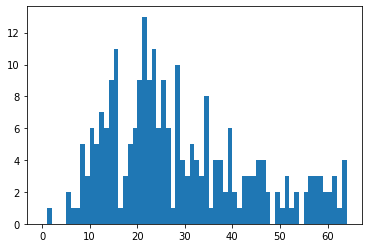

In [218]:
plt.hist(np.array(number_of_files_by_country), bins = np.arange(max(number_of_files_by_country)+1))

In [342]:
number_estimation_quantity = pd.DataFrame(index = files, columns = country_or_area)
number_obs = pd.DataFrame(index = files, columns = country_or_area)
data_by_country_and_files = pd.DataFrame(index = files, columns = country_or_area)
subdataset_by_country_and_files = pd.DataFrame(index = files, columns = country_or_area)


for i in range(len(files)):
    df = pd.read_csv("Data_clean/"+files[i]);
    country = df["Country or Area"].unique();
    for j in range(len(country)):
        number_obs.loc[files[i]][country[j]] = df[df.loc[:,'Country or Area'] == country[j]].shape[0]
        number_estimation_quantity.loc[files[i]][country[j]] = df[(df.loc[:,'Country or Area'] == country[j]) & (df.loc[:,"Quantity Footnotes"] == 1)].shape[0]
        data_by_country_and_files.loc[files[i]][country[j]] = df[df.loc[:,'Country or Area'] == country[j]]["Quantity"].shape[0]
        subdataset_by_country_and_files.loc[files[i]][country[j]] = (df[df.loc[:,'Country or Area'] == country[j]]["Transaction"].unique()).shape[0]



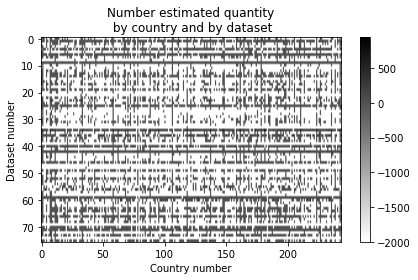

In [450]:
def heatmap2d(arr: np.ndarray, xlabel = "", ylabel = "", title = "", file = None):
    
    plt.imshow(arr, cmap="binary",interpolation=None,aspect="auto")
    plt.colorbar()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    if (file != None):
        plt.tight_layout()
        plt.savefig("FigureMilestone1/"+file);
    plt.show()


heatmap2d(number_estimation_quantity.to_numpy(dtype= float,na_value=-2000),xlabel= "Country number",ylabel = "Dataset number",
          title = "Number estimated quantity\n by country and by dataset",file = "Number_estimated_quantity.png")

In [451]:
by_country = pd.DataFrame(columns = country_or_area)

for j in range(len(country_or_area)):
    by_country.loc["estmation_by_country",country_or_area[j]] = number_estimation_quantity[country_or_area[j]].sum()
    by_country.loc["data_by_country",country_or_area[j]] = number_obs[country_or_area[j]].sum()
    by_country.loc["subdataset_by_country",country_or_area[j]] = subdataset_by_country_and_files[country_or_area[j]].median()
    by_country.loc["dataset_by_country",country_or_area[j]] = subdataset_by_country_and_files[country_or_area[j]].isna().sum()

156


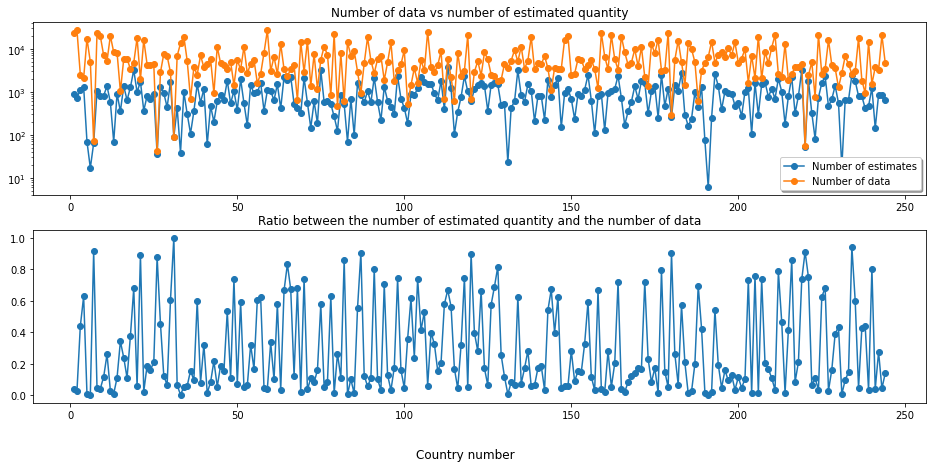

In [480]:
fig, ax = plt.subplots(2,figsize= (16,7))
ax[0].semilogy(np.arange(1,len(country_or_area)+1),by_country.iloc[0,:],'o-')
ax[0].semilogy(np.arange(1,len(country_or_area)+1),by_country.iloc[1,:],'o-')
ax[1].plot(np.arange(1,len(country_or_area)+1),by_country.iloc[0,:]/by_country.iloc[1,:],'o-')


ax[0].set_title('Number of data vs number of estimated quantity')
ax[1].set_title('Ratio between the number of estimated quantity and the number of data')

ax[0].legend(('Number of estimates', 'Number of data'), loc='lower right', shadow=True)

fig.supxlabel("Country number")
#plt.tight_layout()
plt.savefig("FigureMilestone1/Estimated_by_country.png")
print((by_country.iloc[0,:]/by_country.iloc[1,:] > 0.1).sum())

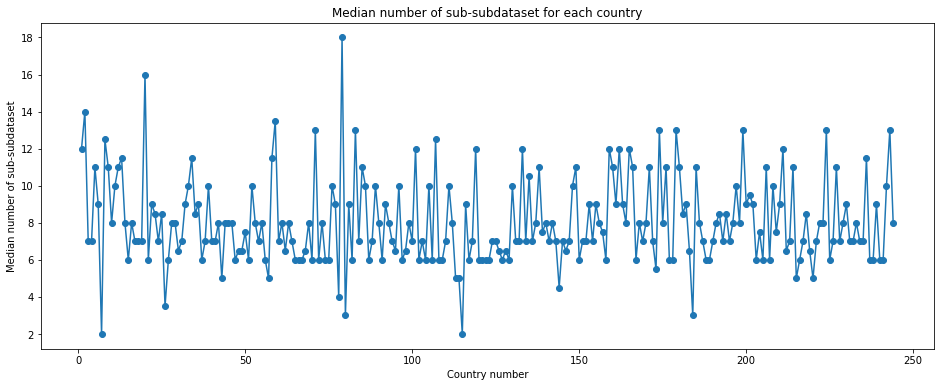

In [479]:
fig, ax = plt.subplots(1,figsize= (16,6),sharex=True)
plt.rcParams['savefig.facecolor'] = "1"
ax.plot(np.arange(1,len(country_or_area)+1),by_country.iloc[2,:],'o-')


ax.set_title('Median number of sub-subdataset for each country')

ax.set_ylabel('Median number of sub-subdataset')
ax.set_xlabel("Country number")

#plt.tight_layout()
plt.savefig("FigureMilestone1/Subdataset_by_country.png")

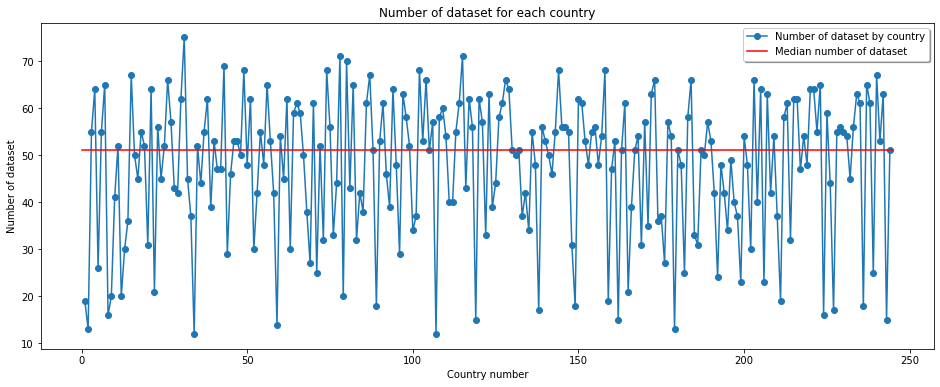

In [481]:
fig, ax = plt.subplots(1,figsize= (16,6),sharex=True)

ax.plot(np.arange(1,len(country_or_area)+1),by_country.iloc[3,:],'o-')
ax.plot(np.arange(0,len(country_or_area)+2),np.repeat(by_country.iloc[3,:].median(),len(country_or_area)+2),'r')

ax.set_title('Number of dataset for each country')

ax.set_ylabel('Number of dataset')
ax.set_xlabel("Country number")

ax.legend(('Number of dataset by country', 'Median number of dataset'), loc='upper right', shadow=True)

#plt.tight_layout()
plt.savefig("FigureMilestone1/Dataset_by_country.png")

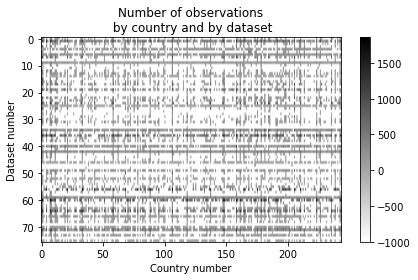

In [455]:
heatmap2d(number_obs.to_numpy(dtype= float,na_value=-1000),xlabel= "Country number",ylabel = "Dataset number",
          title = "Number of observations\n by country and by dataset",file = "Number_of_observations.png")

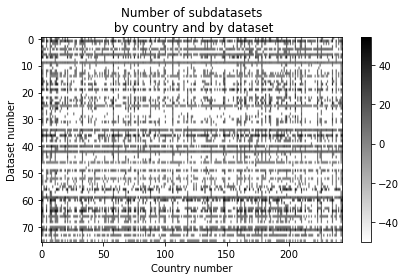

In [456]:
heatmap2d(subdataset_by_country_and_files.to_numpy(dtype= float,na_value=-50),xlabel= "Country number",ylabel = "Dataset number",
          title = "Number of subdatasets\n by country and by dataset",file = "Number_of_subdatasets.png")

In [462]:
len(files)

76